<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function
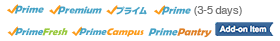

In [1]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.amazon.com/s?k=baby+toys&crid=JC16CI6Y7888&sprefix=baby+t%2Caps%2C1288&ref=nb_sb_noss_2'


url = 'https://www.amazon.com/Ringside-Leather-Boxing-Punching-Filled/dp/B00O806HAK?pd_rd_w=daaNf&content-id=amzn1.sym.deffa092-2e99-4e9f-b814-0d71c40b24af&pf_rd_p=deffa092-2e99-4e9f-b814-0d71c40b24af&pf_rd_r=6VZK6M42Q0EXPNA2QHZ2&pd_rd_wg=HpND9&pd_rd_r=4d4cd1ff-22a0-447e-8ca4-bf12a85e6b5b&pd_rd_i=B00O806HAK&psc=1&ref_=pd_bap_d_grid_rp_0_1_t'
HEADERS = {
    'User-Agent': ('Mozilla/5.0 (X11; Linux x86_64)'
                    'AppleWebKit/537.36 (KHTML, like Gecko)'
                    'Chrome/44.0.2403.157 Safari/537.36'),
    'Accept-Language': 'en-US, en;q=0.5'
}


html = requests.get(url,headers=HEADERS)
print(html.text)
soup = BeautifulSoup(html.text)



In [2]:
title = soup.find('span',{'id':'productTitle'}).text.strip()
price = soup.find('span', {'class':"a-offscreen"}).text.strip()




test = Amazon_Product(url,debug_url=soup)
print(test)


NameError: name 'Amazon_Product' is not defined

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{
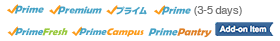

In [54]:
print(soup.prettify())


In [3]:
class Product(object):

    def __init__(self,url,debug_url=None):
        if debug_url is None:
            html = requests.get(url,headers=HEADERS)
            self._soup = BeautifulSoup(html.text)
        else:
            self._soup=debug_url

    def __str__(self):
        return f"name:{self.name}\nprice: {self.price}\nstar_rating:{self.star_rating}\nReview Count: {self.review_count}"

class Amazon_Product(Product):

        @property
        def star_rating(self):
            return  soup.find("span", attrs={'class': 'a-icon-alt'}).text.strip()
        @property
        def name(self):
            return self._soup.find('span',{'id':'productTitle'}).text.strip()
        @property
        def price(self):
            return self._soup.find('span', {'class':"a-offscreen"}).text.strip()
        @property
        def review_count(self):
            return self._soup.find('span', {'id':"acrCustomerReviewText"}).text.strip()
            

In [5]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service# import from webdriver_manager (using underscore)

from webdriver_manager.firefox import GeckoDriverManager
import os
from pathlib import Path


path = Path("C:\Program Files\Mozilla Firefox")
print(path)
options = webdriver.FirefoxOptions()
# options.add_argument('--headless')

driver = webdriver.Firefox(options = options,service = Service(GeckoDriverManager().install()))

C:\Program Files\Mozilla Firefox


[WDM] - Downloading: 19.0kB [00:00, 19.5MB/s]                   
[WDM] - Downloading: 100%|██████████| 1.58M/1.58M [00:00<00:00, 1.98MB/s]


In [ ]:
web = 'https://www.amazon.com'
driver.get(web)
# keep this line of code at the bottom
driver.quit()

In [6]:
# import more
from selenium.webdriver.common.by import By# assign any keyword for searching
web = 'https://www.amazon.com'
driver.get(web)
keyword = "baby rocker"# create WebElement for a search box
search_box = driver.find_element(By.ID, 'twotabsearchtextbox')# type the keyword in searchbox
search_box.send_keys(keyword)# create WebElement for a search button
search_button = driver.find_element(By.ID, 'nav-search-submit-button')# click search_button
search_button.click()# wait for the page to download
driver.implicitly_wait(20)# quit the driver after finishing scraping (please keep this line at the bottom)
# driver.quit()

In [12]:
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

product_name = []
product_asin = []
product_price = []
product_ratings = []
product_ratings_num = []
product_link = []

product_list = []
items = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20")]')))

for item in items:
    name = item.find_element(By.XPATH, './/span[@class="a-size-base-plus a-color-base a-text-normal"]')
    product_name.append(name.text)
    data_asin = item.get_attribute("data-asin")
    product_asin.append(data_asin)
    
    whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
    fraction_price = item.find_elements(By.XPATH,'.//span[@class="a-price-fraction"]')
    if whole_price != [] and fraction_price != []:
        price = '.'.join([whole_price[0].text, fraction_price[0].text])
    else:
        price = 0
    product_price.append(price)
    ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')
    if ratings_box != []:
        ratings = ratings_box[0].get_attribute('aria-label')
        ratings_num = ratings_box[1].get_attribute('aria-label')
    else:
        ratings, ratings_num = 0, 0
    product_ratings.append(ratings)
    product_ratings_num.append(str(ratings_num))
    
#     link = item.find_element(By.XPATH, './/a[@class="a-link-normal a-text-normal"]').get_attribute("href")
    #product_link.append(link)
    link = None
    
    product_list.append(Amazon_Product(name=name.text,asin=product_asin,price=price,star_rating=ratings,review_count=ratings_num,links=link))
print(product_list[0])

for x in product_list:
    print(x)


name:Ingenuity Keep Cozy 3-in-1 Grow with Me Vibrating Baby Bouncer Seat & Infant to Toddler Rocker - Spruce, Newborn and up
price: 49.98
star_rating:4.6 out of 5 stars
Review Count: 2,619
Links: None
name:Ingenuity Keep Cozy 3-in-1 Grow with Me Vibrating Baby Bouncer Seat & Infant to Toddler Rocker - Spruce, Newborn and up
price: 49.98
star_rating:4.6 out of 5 stars
Review Count: 2,619
Links: None
name:Graco Simple Sway Swing
price: 109.97
star_rating:4.6 out of 5 stars
Review Count: 16,361
Links: None
name:Graco DuetSoothe Swing and Rocker
price: 179.97
star_rating:4.7 out of 5 stars
Review Count: 11,608
Links: None
name:Ingenuity Soothe 'n Delight 6-Speed Compact Portable Baby Swing with Music and Bar, Folds for Easy Travel - Cozy Kingdom
price: 76.95
star_rating:4.5 out of 5 stars
Review Count: 7,664
Links: None
name:Bright Starts Playful Pinwheels Portable Baby Bouncer with Vibrating Infant Seat and-Toy Bar, 19.8x13.1x3.4 Inch, Age 0-6 Months
price: 36.17
star_rating:4.5 out of 5 

In [178]:
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

product_name = []
product_asin = []
product_price = []
product_ratings = []
product_ratings_num = []
product_link = []

product_list = []
items = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))

for item in items:
    name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
    product_name.append(name.text)
    data_asin = item.get_attribute("data-asin")
    product_asin.append(data_asin)
    
    whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
    fraction_price = item.find_elements(By.XPATH,'.//span[@class="a-price-fraction"]')
    if whole_price != [] and fraction_price != []:
        price = '.'.join([whole_price[0].text, fraction_price[0].text])
    else:
        price = 0
    product_price.append(price)
    ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')
    if ratings_box != []:
        ratings = ratings_box[0].get_attribute('aria-label')
        ratings_num = ratings_box[1].get_attribute('aria-label')
    else:
        ratings, ratings_num = 0, 0
    product_ratings.append(ratings)
    product_ratings_num.append(str(ratings_num))
    
#     link = item.find_element(By.XPATH, './/a[@class="a-link-normal a-text-normal"]').get_attribute("href")
    #product_link.append(link)
    link = None
    
    product_list.append(Amazon_Product(name=name.text,asin=product_asin,price=price,star_rating=ratings,review_count=ratings_num,links=link))
print(product_list[0])

for x in product_list:
    print(x)

name:Fast Wireless Charger,NANAMI Qi Certified Wireless Charging Stand Compatible iPhone 14/13/12/SE 2020/11/XS Max/XR/X/8 Plus,Samsung Galaxy S22/S21/S20/S10/S9/S8/Note 20 Ultra/10/9 and Qi-Enabled Phone
price: 18.99
star_rating:4.3 out of 5 stars
Review Count: 45,526
Links: None
name:Fast Wireless Charger,NANAMI Qi Certified Wireless Charging Stand Compatible iPhone 14/13/12/SE 2020/11/XS Max/XR/X/8 Plus,Samsung Galaxy S22/S21/S20/S10/S9/S8/Note 20 Ultra/10/9 and Qi-Enabled Phone
price: 18.99
star_rating:4.3 out of 5 stars
Review Count: 45,526
Links: None
name:Charger Station for Apple Multiple Devices, 3 in 1 Fast Wireless Charger Stand Dock Foldable for iPhone 14 13 12 11 Pro X XS 8 Plus Apple Watch Series 8 7 6 SE 5 4 3 2 & AirPods 3/2/Pro with Adapter
price: 29.99
star_rating:4.6 out of 5 stars
Review Count: 1,665
Links: None
name:Apple MagSafe Charger - Wireless Charger with Fast Charging Capability, Type C Wall Charger, Compatible with iPhone and AirPods
price: 37.90
star_ratin

In [119]:
print(items[0].tag_name)


div


In [10]:
whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
fraction_price = item.find_elements(By.XPATH,'.//span[@class="a-price-fraction"]')
if whole_price != [] and fraction_price != []:
    price = '.'.join([whole_price[0].text, fraction_price[0].text])
else:
    price = 0
    product_price.append(price)
    
print(price)

167.99


In [11]:
class Product(object):

    def __init__(self,*args,**argv):
        self._name = argv.get('name')
        self._price = argv.get('price')
        self._star_rating = argv.get('star_rating')
        self._review_count = argv.get('review_count')
        self._links = argv.get('links')

    def __str__(self):
        return f"name:{self.name}\nprice: {self.price}\nstar_rating:{self.star_rating}\nReview Count: {self.review_count}\nLinks: {self.links}"

    @property
    def star_rating(self):
        return  self._star_rating
    @property
    def name(self):
        return self._name
    @property
    def price(self):
        return self._price
    @property
    def review_count(self):
        return self._review_count
    @property
    def links(self):
        return self._links
                
class Amazon_Product(Product):
    def __init__(self,*args,**argv):
        super(Amazon_Product,self).__init__(*args,**argv)
        self._asin = argv.get("asin")
    

In [162]:
test = Amazon_Product(name = "poop Mcscoops",price = 325,review_count=3)

print(test)

name:poop Mcscoops
price: 325
star_rating:None
Review Count: 3
Links: None
